<a href="https://colab.research.google.com/github/commitit/Stock-Prediction/blob/main/stock_predictionv4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the stock price movement of American Express.

* We are using the stock data for American Express from the year 1972 to 2020 and try to predict the closing price for 30 days.

* Closing Price is the last price at which a stock trades during a regular trading session.

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import tensorflow as tf

import datetime

# Data Exploration

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/commitit/Stock-Prediction/main/AXP.csv")

In [3]:
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-06-01,3.693287,3.693287,3.693287,3.693287,0.406085,0.0
1,1972-06-02,3.677195,3.677195,3.677195,3.677195,0.404316,0.0
2,1972-06-05,3.604777,3.604777,3.604777,3.604777,0.396353,0.0
3,1972-06-06,3.411664,3.411664,3.411664,3.411664,0.375120,0.0
4,1972-06-07,3.371432,3.371432,3.371432,3.371432,0.370696,0.0
5,1972-06-08,3.451896,3.451896,3.451896,3.451896,0.379544,0.0
6,1972-06-09,3.427757,3.427757,3.427757,3.427757,0.376890,0.0
7,1972-06-12,3.484082,3.484082,3.484082,3.484082,0.383082,0.0
8,1972-06-13,3.484082,3.484082,3.484082,3.484082,0.383082,0.0
9,1972-06-14,3.443850,3.443850,3.443850,3.443850,0.378659,0.0


In [4]:
# We take a look at the last rows of our dataset
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
12059,2020-03-26,92.239998,99.690002,90.839996,93.290001,92.774651,9459400.0
12060,2020-03-27,87.940002,91.970001,85.820000,88.730003,88.239845,6999800.0
12061,2020-03-30,88.510002,91.389999,85.269997,90.269997,89.771332,5565000.0
12062,2020-03-31,89.940002,90.900002,85.070000,85.610001,85.137077,6075900.0
12063,2020-04-01,80.650002,81.309998,77.000000,77.839996,77.409996,8307600.0


In [5]:
# We check the datatype and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12064 entries, 0 to 12063
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       12064 non-null  object 
 1   Open       12064 non-null  float64
 2   High       12064 non-null  float64
 3   Low        12064 non-null  float64
 4   Close      12064 non-null  float64
 5   Adj Close  12064 non-null  float64
 6   Volume     12064 non-null  float64
dtypes: float64(6), object(1)
memory usage: 659.9+ KB


In [6]:
#Convert "Date" column to datetime format and set Date as an index
df["Date"] = pd.to_datetime(df["Date"])
df.index = df.pop("Date")

In [7]:
df = df[["Close"]]

In [88]:
df.head()

,Close
Date,
1972-06-01,3.693287
1972-06-02,3.677195
1972-06-05,3.604777
1972-06-06,3.411664
1972-06-07,3.371432


In [9]:
df.describe()

,Close
count,12064.000000
mean,29.681398
std,30.876242
min,1.134539
25%,4.747363
50%,13.038323
75%,47.703850
max,136.929993


# Data Visualization

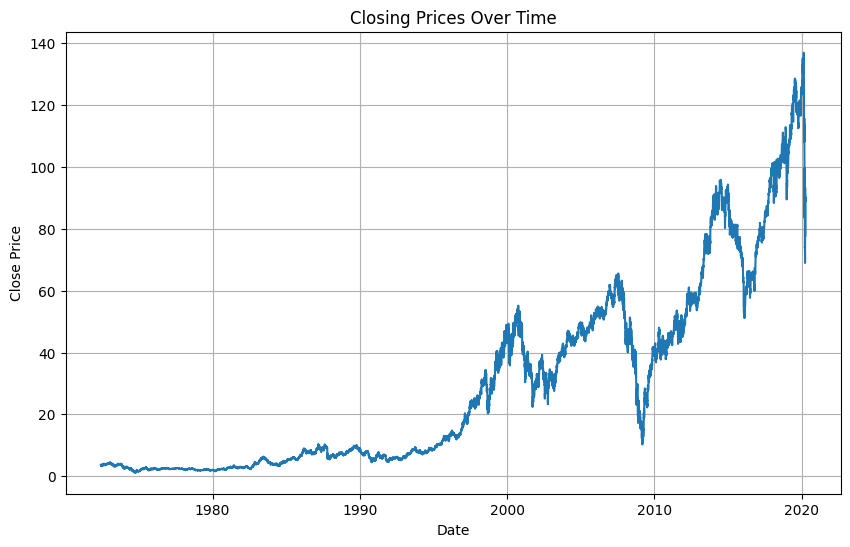

In [10]:
#Visualizing the closing price from 1972 until 2020
plt.figure(figsize=(10, 6))
plt.plot(df)
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

# Data Preparation

###Spliting the data to Training and Test data
####Importing MinMaxScaler from scikit-learn to scale our dataset into numbers between 0 and 1

In [11]:
#For preprocessing
from sklearn.preprocessing import MinMaxScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse

In [12]:
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df).reshape(-1,1))
df1

array([[0.01884266],
       [0.01872416],
       [0.01819087],
       ...,
       [0.65639501],
       [0.62207872],
       [0.56486027]])

In [13]:
#To see the scaled data in a DF format, we create a new DF using the scaled values.
#Create a new DataFrame with the scaled values and original dates in the index
scaled_df = pd.DataFrame(df1, index = df.index, columns = ["Scaled_Close"])
scaled_df.head()

,Scaled_Close
Date,
1972-06-01,0.018843
1972-06-02,0.018724
1972-06-05,0.018191
1972-06-06,0.016769
1972-06-07,0.016473


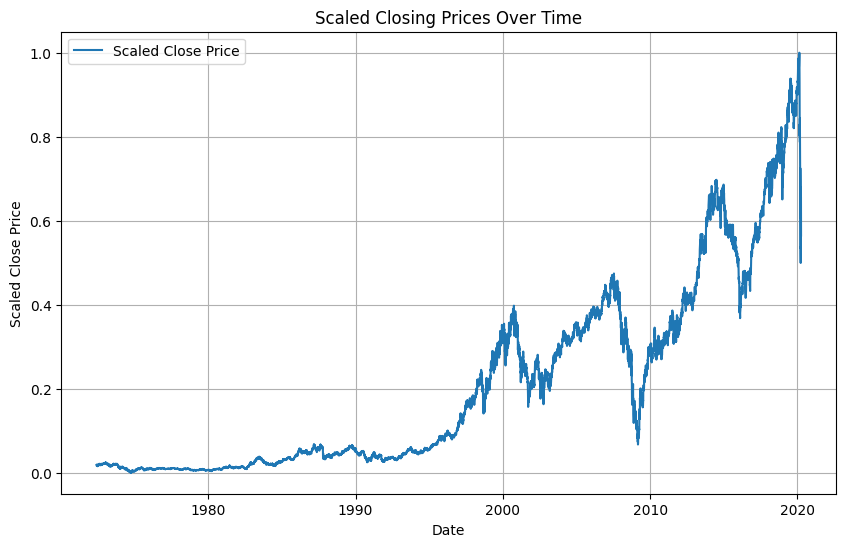

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(scaled_df.index, scaled_df["Scaled_Close"], label="Scaled Close Price")
plt.title('Scaled Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.grid(True)
plt.show()

We will use a 80% and 20% split for the training and test sets.

In [15]:
#Splitting dataset into train and test sets.
#Determining Training Size: 80% of the total dataset length
training_size = int(len(df1)*0.8)

#Determining Test Size: remaining 20% of the total dataset length
test_size = len(df1)-training_size

In [16]:
#Inspecting the sizes of our training and test sets
print ("Training Size: ", training_size)
print ("Test Size: ", test_size)

Training Size:  9651
Test Size:  2413


In [17]:
# Splitting Dataset: train_data contains the first training_size rows of the scaled data, and test_data contains the remaining rows.
train_data,test_data=df1[0:training_size,:], df1[training_size:len(df1),:1]

In [18]:
#Checking the  length (number of rows) in our training and test set

print("Length of Training Data:", len(train_data))
print("Length of Test Data:", len(test_data))


Length of Training Data: 9651
Length of Test Data: 2413


In [109]:
#Inspecting the train data as NumPy array
train_data

array([[0.28524858],
       [0.2940854 ],
       [0.29268625],
       ...,
       [0.65639501],
       [0.62207872],
       [0.56486027]])

# Preparing the data for LSTM
* Set the timestep to 100
  * time_step (int): The number of time steps to use for each input sequence.
* Convert the time series array into input-output pairs for an autoregressive model.
* Return a tuple containing NumPy arrays (X, Y), where X is the input sequence matrix and Y is the target values array.

In [96]:
#Function to create X, Y numpy arrays
def create_AR(stock_data, time_step=1):
	X, Y = [], []
	for i in range(len(stock_data)-time_step):
		a = stock_data[i:(i+time_step), 0]
		X.append(a)
		Y.append(stock_data[i+time_step,0])
	return np.array(X), np.array(Y)


In [106]:
#applying the create_AR function to create input-output pairs for our training and test sets with a time step = 100 ()
time_step = 100
x_train, y_train = create_AR(train_data, time_step)
x_test, y_test = create_AR(test_data, time_step)

In [107]:
print("Shape of X_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (9551, 100)
Shape of y_train: (9551,)


In [108]:
print("Shape of X_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_test: (2313, 100)
Shape of y_test: (2313,)


In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

# Build the Model
* Add LSTM layer along with dropout layers to prevent overfitting. After that, we add a Dense layer that specifies a one unit output. Next, we compile the model using the adam optimizer and set the loss as the mean_squarred_error

In [25]:
### Creating the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

model=Sequential()

model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))

model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(32, activation = "relu"))
model.add(Dense(32, activation = "relu"))

model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam', metrics = ["mean_absolute_error"])

modelresult = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=25, batch_size=64,verbose=1)


Epoch 1/25
150/150 [==============================] - 17s 22ms/step - loss: 0.0021 - mean_absolute_error: 0.0223 - val_loss: 0.0098 - val_mean_absolute_error: 0.0843
Epoch 2/25
150/150 [==============================] - 2s 15ms/step - loss: 2.7359e-04 - mean_absolute_error: 0.0104 - val_loss: 0.0082 - val_mean_absolute_error: 0.0779
Epoch 3/25
150/150 [==============================] - 2s 15ms/step - loss: 2.5168e-04 - mean_absolute_error: 0.0102 - val_loss: 0.0047 - val_mean_absolute_error: 0.0591
Epoch 4/25
150/150 [==============================] - 3s 18ms/step - loss: 2.0779e-04 - mean_absolute_error: 0.0095 - val_loss: 0.0024 - val_mean_absolute_error: 0.0397
Epoch 5/25
150/150 [==============================] - 3s 19ms/step - loss: 1.6984e-04 - mean_absolute_error: 0.0085 - val_loss: 8.3274e-04 - val_mean_absolute_error: 0.0204
Epoch 6/25
150/150 [==============================] - 2s 15ms/step - loss: 1.8651e-04 - mean_absolute_error: 0.0092 - val_loss: 0.0012 - val_mean_absolute

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 32)                1

# Model Evaluation

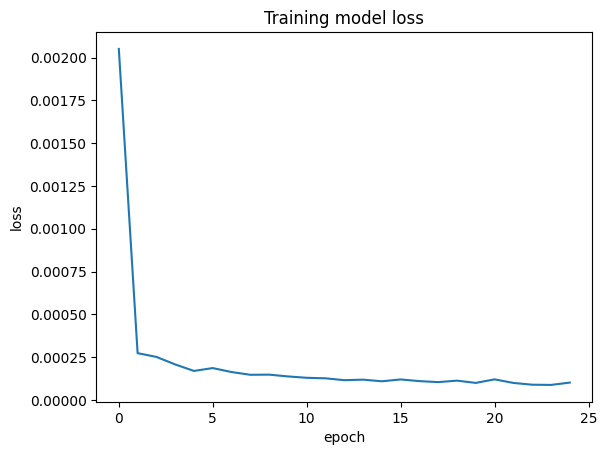

In [27]:
plt.plot(modelresult.history["loss"])
plt.title('Training model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [28]:
#predicted stock price on train and test data
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

73/73 [==============================] - 1s 10ms/step


In [47]:
#Inverse transform to get actual value
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

In [48]:
train_pred

array([[ 2.941901 ],
       [ 2.9503946],
       [ 2.9617443],
       ...,
       [37.989685 ],
       [37.756695 ],
       [37.692867 ]], dtype=float32)

In [124]:
P_train=df[100:len(train_pred)+100]
P_train = pd.DataFrame(train_pred, index = P_train.index, columns = ["Predicted_train"])
len(P_train)

9551

In [125]:
P_train.head()

,Predicted_train
Date,
1972-10-23,2.941901
1972-10-24,2.950395
1972-10-25,2.961744
1972-10-26,2.974244
1972-10-27,2.986525


In [126]:
P_test=df[-len(test_pred):]
P_test = pd.DataFrame(test_pred, index = P_test.index, columns = ["Predicted_test"])
len(P_test)

2313

In [128]:
P_test.tail()

,Predicted_test
Date,
2020-03-26,70.559608
2020-03-27,73.354881
2020-03-30,76.027641
2020-03-31,78.064857
2020-04-01,78.829765


Plot our predicted stock prices and the actual stock price

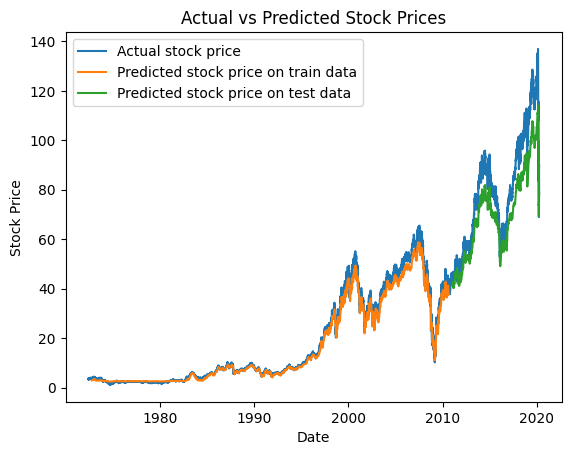

In [131]:
#plt.plot(scaler.inverse_transform(df1), label = "Actual stock price")
plt.plot(df, label = "Actual stock price")
plt.plot(P_train, label = "Predicted stock price on train data")
plt.plot(P_test, label = "Predicted stock price on test data")

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

In [ ]:
#appending train and test pred
#test = np.vstack((train_pred, test_pred))

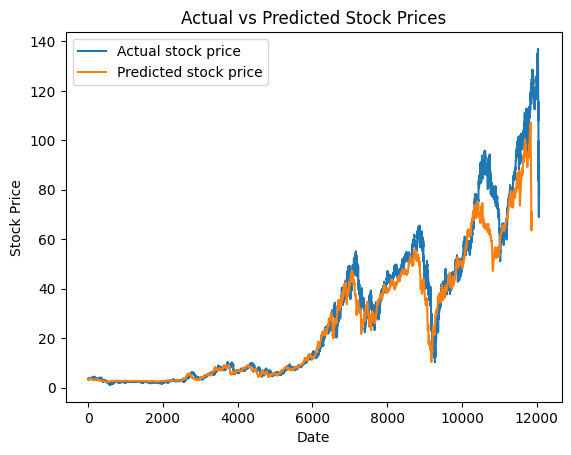

In [ ]:
#Combining the predicted data to create uniform data visualization
#plt.plot(scaler.inverse_transform(df1), label = "Actual stock price")
#plt.plot(test, label = "Predicted stock price")

#plt.xlabel('Date')
#plt.ylabel('Stock Price')
#plt.title('Actual vs Predicted Stock Prices')
#plt.legend()
#plt.show()

# Forecasting Stock price for the next 30 days

In [199]:
#we  take the latest 100 values, create a data to get the predicted value
len(test_data)

2413

In [200]:
#Extracting the last 100 days from the test data
pred_inp = test_data[-100:]

In [201]:
len(pred_inp)

100

In [202]:
pred_inp = pred_inp.reshape(1,-1)

In [203]:
pred_inp.shape

(1, 100)

In [204]:
inp_list = list(pred_inp)

In [205]:
#Creating list of the last 100 data
inp_list = inp_list[0].tolist()

In [214]:
#Predicting next 30 days price using the current data
#It will predict in sliding window method (algorithm) with stride 1 (we shift by 1 to have 101 values)
pred_output=[]
n_steps=100
i=0
while(i<30): # we repeat it 30 times (sliding window algorithm)

    if(len(inp_list)>100):
        pred_inp = np.array(inp_list[1:])
        pred_inp = pred_inp.reshape(1,-1)
        pred_inp = pred_inp.reshape((1, n_steps, 1))
        future_stock = model.predict(pred_inp, verbose=0)
        inp_list.extend(future_stock[0].tolist())
        inp_list = inp_list[1:]
        pred_output.extend(future_stock.tolist())
        i=i+1
    else:
        pred_inp = pred_inp.reshape((1, n_steps,1))
        future_stock = model.predict(pred_inp, verbose=0)
        inp_list.extend(future_stock[0].tolist())
        pred_output.extend(future_stock.tolist())
        i=i+1


print(pred_output)

[[0.33019110560417175], [0.3255891501903534], [0.32108166813850403], [0.31666767597198486], [0.31234505772590637], [0.30811065435409546], [0.3039611279964447], [0.29989317059516907], [0.2959038019180298], [0.2919905185699463], [0.28815141320228577], [0.2843851149082184], [0.2806909382343292], [0.2770685851573944], [0.2735182046890259], [0.270040363073349], [0.2666357755661011], [0.2633053660392761], [0.26005005836486816], [0.25687074661254883], [0.25376832485198975], [0.2507435977458954], [0.24759675562381744], [0.2442491054534912], [0.24092847108840942], [0.23760062456130981], [0.23424820601940155], [0.23088499903678894], [0.2275158166885376], [0.2241324484348297]]


In [215]:
len(pred_output)

30

In [265]:
#convert the predictions to actual values
pred_stock = scaler.inverse_transform(pred_output)

#convert the array to Pandas Dataframe
pred_stock = pd.DataFrame(pred_stock,columns=["Predictions"])
pred_stock

,Predictions
0,45.972990
1,45.348066
2,44.735970
3,44.136570
4,43.549578
5,42.974565
6,42.411078
7,41.858668
8,41.316930
9,40.785524


In [272]:
#get last date from df
curr_date = df.index[-1]

from datetime import timedelta
new_data = []
for i in range(30):
  curr_date = curr_date + timedelta(days=1)
  new_data.append({'Predictions':pred_stock["Predictions"][i], "Date": curr_date})

In [273]:
new_data = pd.DataFrame(new_data).set_index("Date")

In [274]:
new_data

,Predictions
Date,
2020-04-02,45.972990
2020-04-03,45.348066
2020-04-04,44.735970
2020-04-05,44.136570
2020-04-06,43.549578
2020-04-07,42.974565
2020-04-08,42.411078
2020-04-09,41.858668
2020-04-10,41.316930


In [217]:
#Creating a empty plot graph one after another
plot_new=np.arange(1,101) # first 100 value  - train data
plot_pred=np.arange(101,131) # predict value for the next 30 days

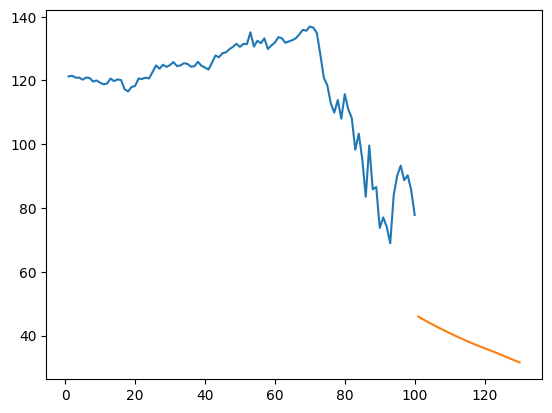

In [218]:
plt.plot(plot_new, scaler.inverse_transform(df1[-100:]))
plt.plot(plot_pred, scaler.inverse_transform(pred_output))

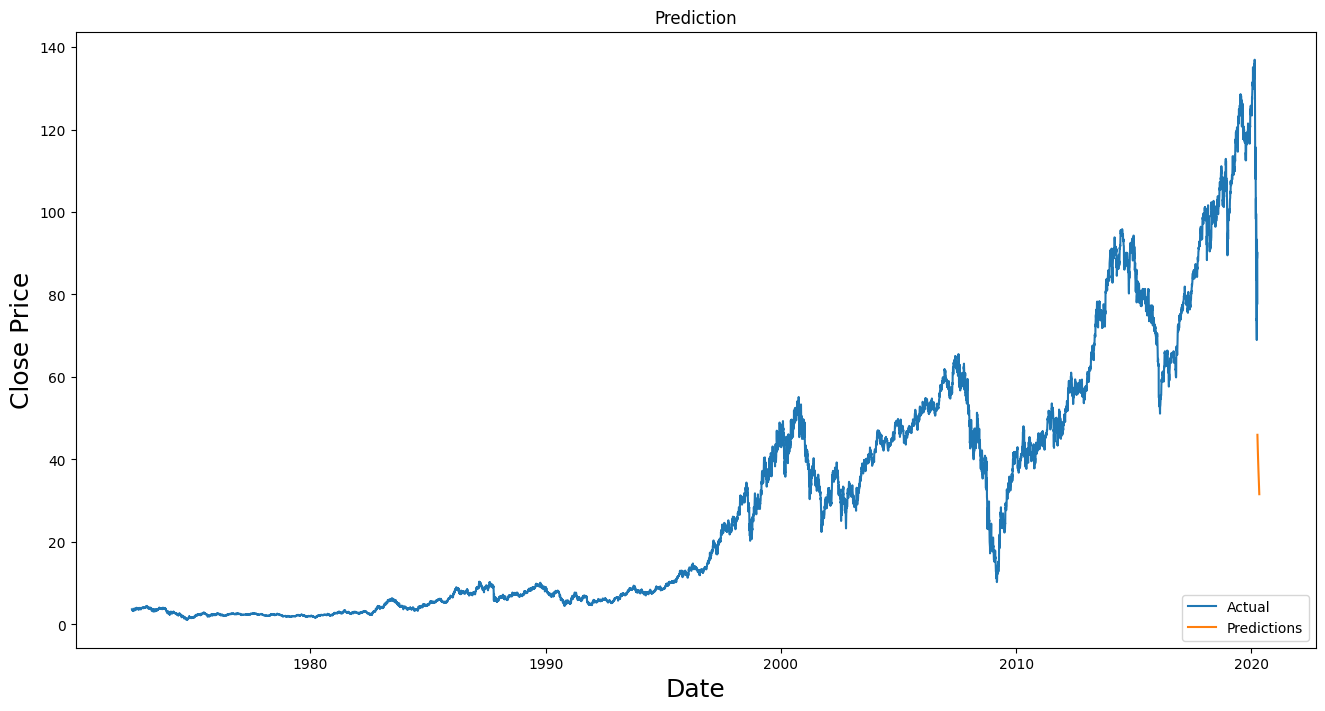

In [275]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df['Close'])
plt.plot(new_data['Predictions'])
plt.legend(['Actual', 'Predictions'], loc='lower right')
plt.show()

In [169]:
ds_new = df1.tolist()

In [170]:
len(ds_new)

12064

In [171]:
#Extends helps us to fill the missing value with approx value
ds_new.extend(pred_output)

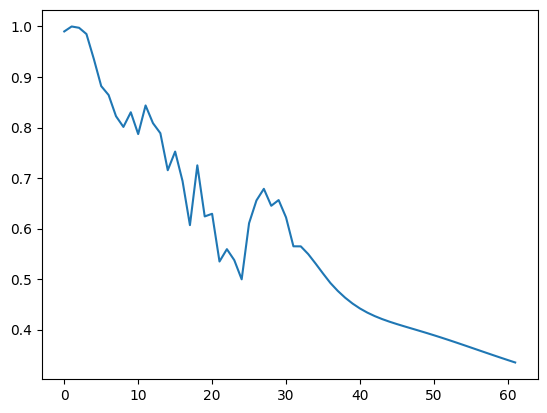

In [172]:
plt.plot(ds_new[12032:])

In [173]:
#Creating final data for plotting
final_graph = scaler.inverse_transform(ds_new).tolist()

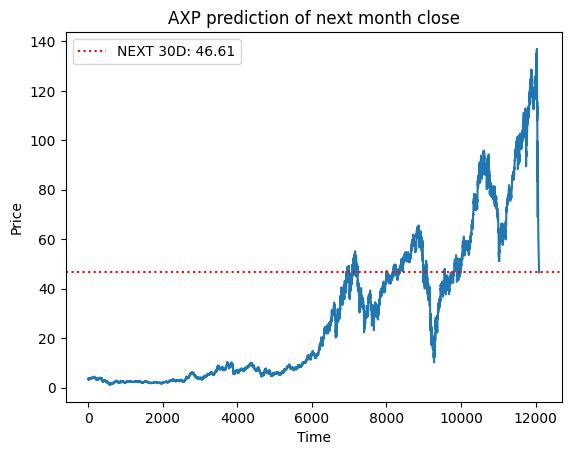

In [174]:
#Plotting final results with predicted value after 30 Days

stock_symbol = "AXP"
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month close".format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()

In [175]:
print(train_pred[:5])
print(test_pred[:5])

[[2.941901 ]
 [2.9503946]
 [2.9617443]
 [2.974244 ]
 [2.9865246]]
[[42.11568 ]
 [42.138836]
 [42.06997 ]
 [41.900093]
 [41.69217 ]]


In [176]:
# Evaluate Performance metrics
# Calculate and print additional performance metrics such as RMSE, Mean Absolute Error (MAE), or others, depending on your preference.

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate performance metrics
train_rmse = mean_squared_error(y_train, train_pred, squared=False)
test_rmse = mean_squared_error(y_test, test_pred, squared=False)

train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)

print("Train RMSE: %.2f" % train_rmse)
print("Test RMSE: %.2f" % test_rmse)
print("Train MAE: %.2f" % train_mae)
print("Test MAE: %.2f" % test_mae)


Train RMSE: 23.06
Test RMSE: 71.74
Train MAE: 16.37
Test MAE: 69.65
